In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,  accuracy_score, classification_report
from sklearn.metrics import accuracy_score
import pickle

In [87]:
df = pd.read_csv("/content/sample_data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [88]:
df.shape

(768, 9)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [90]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [91]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

bmi

<Axes: xlabel='BMI', ylabel='Count'>

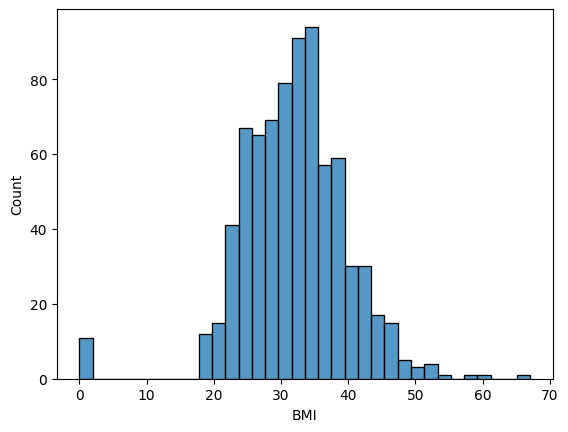

In [92]:
sns.histplot(data=df['BMI'])

Glucose

<Axes: xlabel='Glucose', ylabel='Count'>

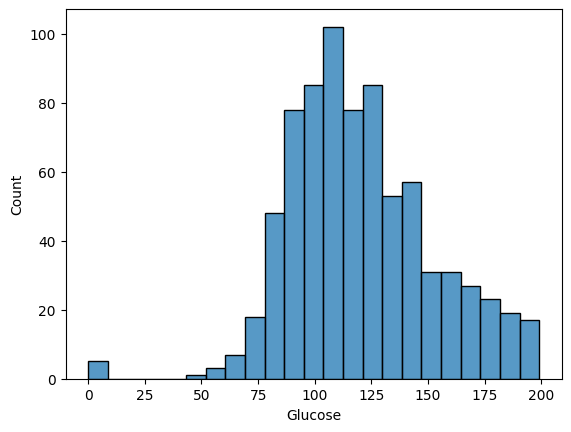

In [93]:
sns.histplot(data=df['Glucose'])

BloodPressure

<Axes: xlabel='BloodPressure', ylabel='Count'>

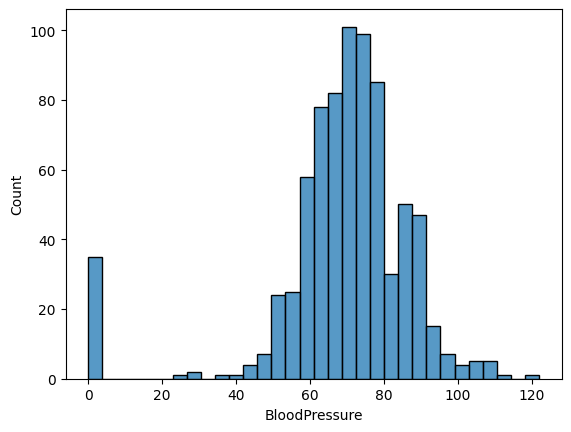

In [94]:
sns.histplot(data=df['BloodPressure'])

SkinThickness

<Axes: xlabel='SkinThickness', ylabel='Count'>

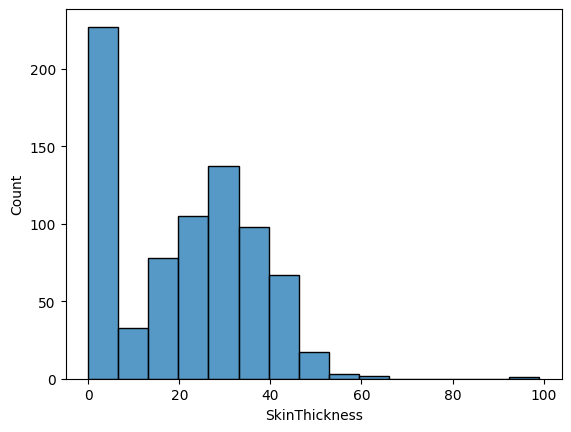

In [95]:
sns.histplot(data=df['SkinThickness'])

Insulin

<Axes: xlabel='Insulin', ylabel='Count'>

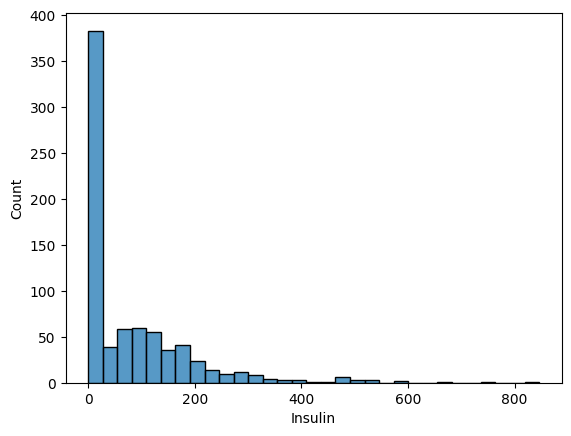

In [96]:
sns.histplot(data=df['Insulin'])

Age

<Axes: xlabel='Age', ylabel='Count'>

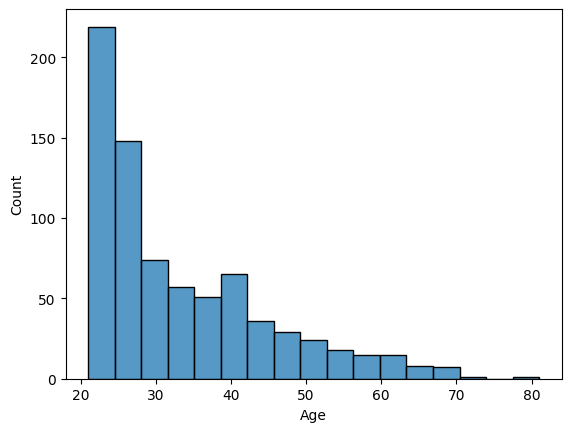

In [97]:
sns.histplot(data=df['Age'])

In [98]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)

In [99]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

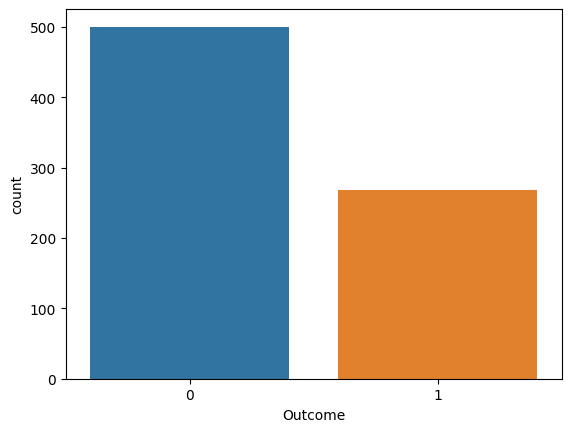

In [100]:
sns.countplot(x=df["Outcome"])

In [101]:
X = df.drop(columns = 'Outcome', axis = 1)
Y = df['Outcome']

In [102]:
scaler = StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)
print(X_standard)

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29912651 -0.47378505
  -0.87137393]]


In [103]:
X = X_standard

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, stratify = Y, random_state = 2)

In [105]:
print('X_train:', X_train.shape)
print('y_train:', Y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', Y_test.shape)

X_train: (614, 8)
y_train: (614,)
X_test: (154, 8)
y_test: (154,)


**Обучение**

Suppoprt Vector Machine Classifier

In [106]:
model = svm.SVC(kernel = 'linear')
model.fit(X_train, Y_train)

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print(" Accuracy:", training_data_accuracy)

 Accuracy: 0.7801302931596091


Logistic Regression

In [107]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

Y_pred_lr = lr.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred_lr))

Accuracy: 0.7402597402597403


Decision Tree

In [108]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, y_pred_dt))

Accuracy: 0.6948051948051948


In [109]:
model.fit(X_train, Y_train)

X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print("Accuracy score of the testing data: ",testing_data_accuracy)

Accuracy score of the testing data:  0.7662337662337663


In [110]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       100
           1       0.75      0.50      0.60        54

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154



**Predict**

In [111]:
input_data = (5,166,72,19,175,25.8,0.587,51)

input_data_array = np.asarray(input_data)
input_data_reshaped =  input_data_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

[[ 0.3429808   1.45689939 -0.03351824 -1.15054099  0.39765315 -0.96863623
   0.34768723  1.51108316]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [112]:
result = model.predict(std_data)
print(result)

[1]


In [113]:
with open('diabet_model.pkl','wb') as f:
  pickle.dump(model,f)